The characteristic function of the normal distribution is given by,
$$\phi_X(u) = exp( i \mu u - \frac{1}{2} \sigma^2 u^2)$$
We set $\mu = 0, \sigma = 1$

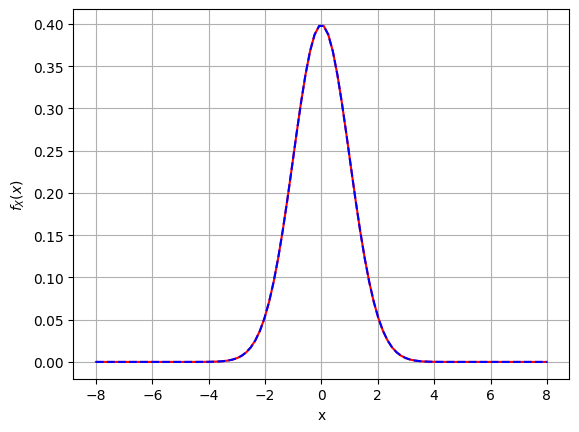

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.fft as fft
import scipy.interpolate as interpolate

def RecoverDensity(cf,x,N = 10000):
    i = complex(0.0,1.0) #assigning i=sqrt(-1)
    
    # specification of the grid for u
    u_max = 20.0
    du = u_max / N
    # Note that we apply the inversion lemma here so we are only integrating from 0 to infty
    u = np.linspace(0,N-1,N) * du
    
    # grid for x
    b   = np.min(x)
    dx  = 2.0 * np.pi / (N*du)
    x_i = b + np.linspace(0,N-1,N) * dx
    
    phi = np.exp(-i*b*u) * cf(u)
    
    gamma_1 = np.exp(-i*x_i*u[0])*cf(u[0])
    gamma_2 = np.exp(-i*x_i*u[-1])*cf(u[-1])
    
    phi_boundary = 0.5 * (gamma_1 + gamma_2)    
     
    f_xi = du/np.pi * np.real(fft.fft(phi)- phi_boundary)
    
    # cubic interpolation between discrete points
    f_xiInterp = interpolate.interp1d(x_i,f_xi,kind='cubic')   
    
    return f_xiInterp(x)
    
def mainCalculation():
    i = complex(0.0, 1.0) #assigning i=sqrt(-1)

    # setting for normal distribution
    mu = 0.0
    sigma = 1.0 
        
    # Define characteristic function for the normal distribution
    cF = lambda u : np.exp(i * mu * u - 0.5 * sigma**2.0 * u**2.0);
    
    # define domain for density
    # Pdf from range -8 to 8
    x = np.linspace(-8.0,8.0,100)
    f_XExact = st.norm.pdf(x,mu,sigma)
    
    # recovered density
    f_XR = RecoverDensity(cF,x,2**8)
    
    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    plt.plot(x,f_XExact,'-r')
    plt.plot(x,f_XR,'--b')
    
    
mainCalculation()